## Contents: <a class="anchor" id="Top"></a>

* [1. Importing Libraries](#1)
* [2. Dataset](#2)
* [3. Data Analysis](#3)
* [4. Data Pre-processing ](#4)
* [5. Train - Valid - Test Split ](#5)
* [6. Model Evaluation](#6)
    * [6.1 Dummy Regressor (Baseline Model)](#6.1)
    * [6.2 K-Nearest Neighbors (Algorithm -1)](#6.2)
        * [6.2.1 KNN Without Scaling (General Model)](#6.2.1)
        * [6.2.2 KNN With Scaling](#6.2.2)
        * [6.2.3 Hyperparamter Tuning](#6.2.3)
            * [6.2.3.1 RandomSearchCV](#6.2.3.1)
            * [6.2.3.2 GridSearchCV](#6.2.3.2)
    * [6.3 Decision Tree (Algorithm -2)](#6.3)
        * [6.3.1 Decision Tree (General Model)](#6.3.1)
        * [6.3.2 Hyperparamter Tuning](#6.3.2)
            * [6.3.2.1 RandomSearchCV](#6.3.2.1)
            * [6.3.2.2 GridSearchCV](#6.3.2.2)
* [7. Model Selection](#7)
* [8. Test Set Evaluation](#8)
* [9. Conclusion](#9)
* [10. References](#10)

---
## 1. Importing Libraries <a class="anchor" id="1"></a>

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Visualisation and Manipulation Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Data Preprocessing Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Regression Model Libraries
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 

# Hyperparameter Tuning Libraries
import math
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation Metric Libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

---
## 2. Dataset <a class="anchor" id="2"></a>

In [3]:
df = pd.read_csv("data.csv") # loading the dataset

In [4]:
df.head() # head of the dataset

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info() # displaying the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

> - The target feature (Rented Bike Count) is of continuous data which means it is a regression problem. 

[Back to Contents](#Top)

---
## 3. Data Analysis <a class="anchor" id="3"></a>

Text(0.5, 1.0, 'The Count of Functioning Day Feature')

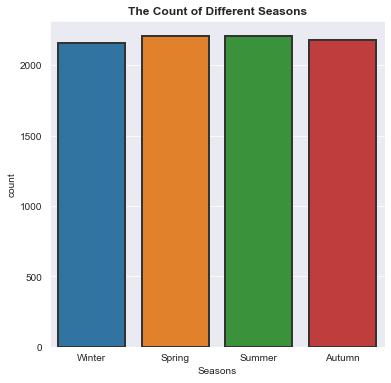

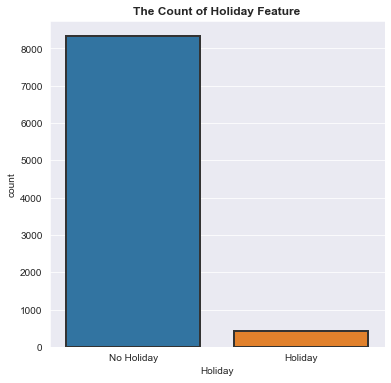

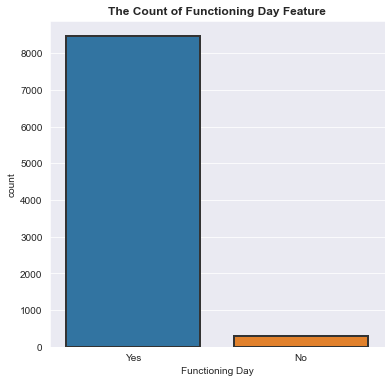

In [6]:
# Discrete Variables 
plt.figure(figsize=(6,6))
sns.countplot(x = "Seasons", data = df,linewidth=2,edgecolor=".2")
plt.title("The Count of Different Seasons",fontweight="bold")

plt.figure(figsize=(6,6))
sns.countplot(x = "Holiday", data = df,linewidth=2,edgecolor=".2")
plt.title("The Count of Holiday Feature",fontweight="bold")

plt.figure(figsize=(6,6))
sns.countplot(x = "Functioning Day", data = df,linewidth=2,edgecolor=".2")
plt.title("The Count of Functioning Day Feature",fontweight="bold")

Text(0.5, 1.0, 'Snowfall')

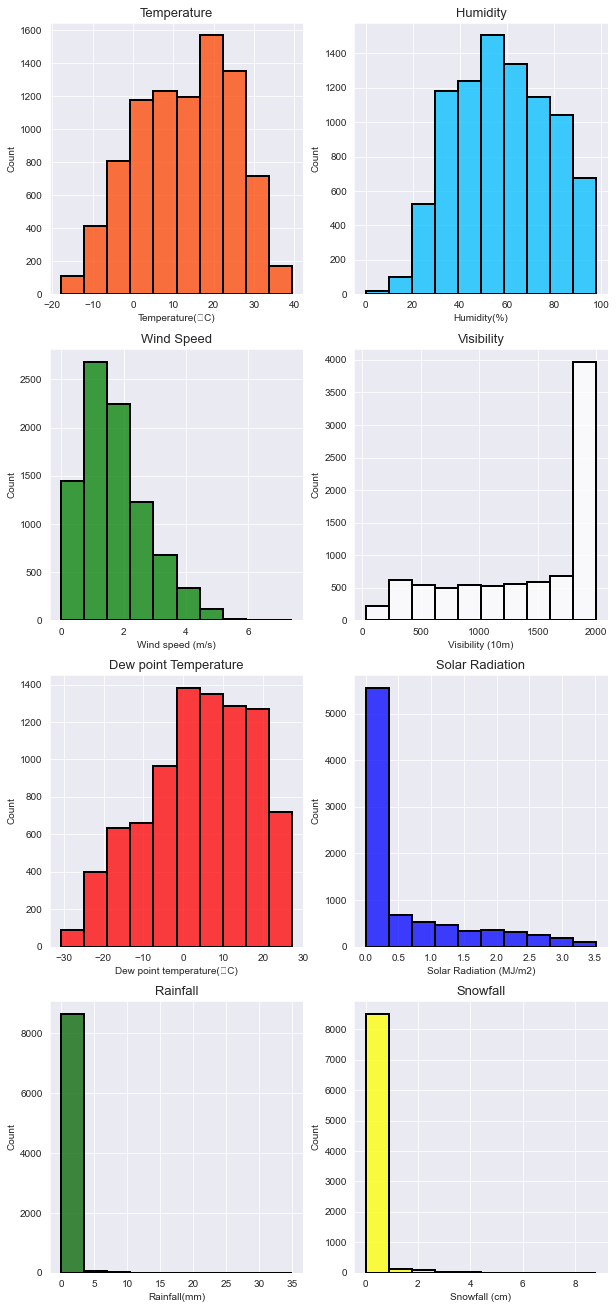

In [6]:
# Continuous Variables 
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (10,23))
sns.histplot(data=df, x ="Temperature(�C)", ax = ax[0][0], 
             bins = 10, stat = "count", color = "orangered", 
             edgecolor = "black", linewidth = 2).set_title("Temperature", fontsize = 13)

sns.histplot(data=df, x ="Humidity(%)", ax = ax[0][1], 
             bins = 10, stat = "count", color = "deepskyblue", 
             edgecolor = "black", linewidth = 2).set_title("Humidity", fontsize = 13)

sns.histplot(data=df, x ="Wind speed (m/s)", ax = ax[1][0], 
             bins = 10, stat = "count", color = "green", 
             edgecolor = "black", linewidth = 2).set_title("Wind Speed", fontsize = 13)

sns.histplot(data=df, x ="Visibility (10m)", ax = ax[1][1], 
             bins = 10, stat = "count", color = "white", 
             edgecolor = "black", linewidth = 2).set_title("Visibility", fontsize = 13)

sns.histplot(data=df, x ="Dew point temperature(�C)", ax = ax[2][0], 
             bins = 10, stat = "count", color = "red", edgecolor = "black", 
             linewidth = 2).set_title("Dew point Temperature", fontsize = 13)

sns.histplot(data=df, x ="Solar Radiation (MJ/m2)", ax = ax[2][1], 
             bins = 10, stat = "count", color = "blue", edgecolor = "black", 
             linewidth = 2).set_title("Solar Radiation", fontsize = 13)

sns.histplot(data=df, x ="Rainfall(mm)", ax = ax[3][0], 
             bins = 10, stat = "count", color = "darkgreen", edgecolor = "black", 
             linewidth = 2).set_title("Rainfall", fontsize = 13)

sns.histplot(data=df, x ="Snowfall (cm)", ax = ax[3][1], 
             bins = 10, stat = "count", color = "yellow", edgecolor = "black", 
             linewidth = 2).set_title("Snowfall", fontsize = 13)

Text(0.5, 1.0, 'Seasons Vs Rented Bike')

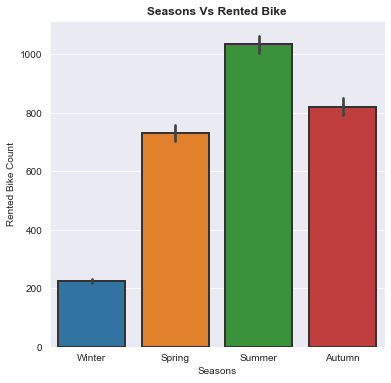

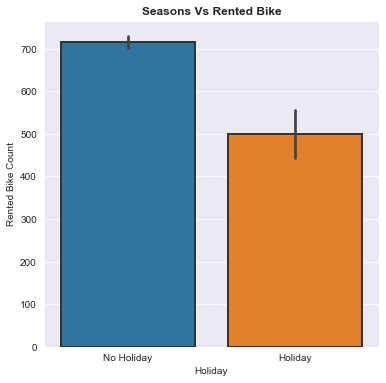

In [7]:
# Bivariate analysis with target feature
plt.figure(figsize=(6,6))
sns.barplot(x = "Seasons",y="Rented Bike Count" ,data = df,linewidth=2,edgecolor=".2")
plt.title("Seasons Vs Rented Bike",fontweight="bold")

plt.figure(figsize=(6,6))
sns.barplot(x = "Holiday",y="Rented Bike Count" ,data = df,linewidth=2,edgecolor=".2")
plt.title("Seasons Vs Rented Bike",fontweight="bold")

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

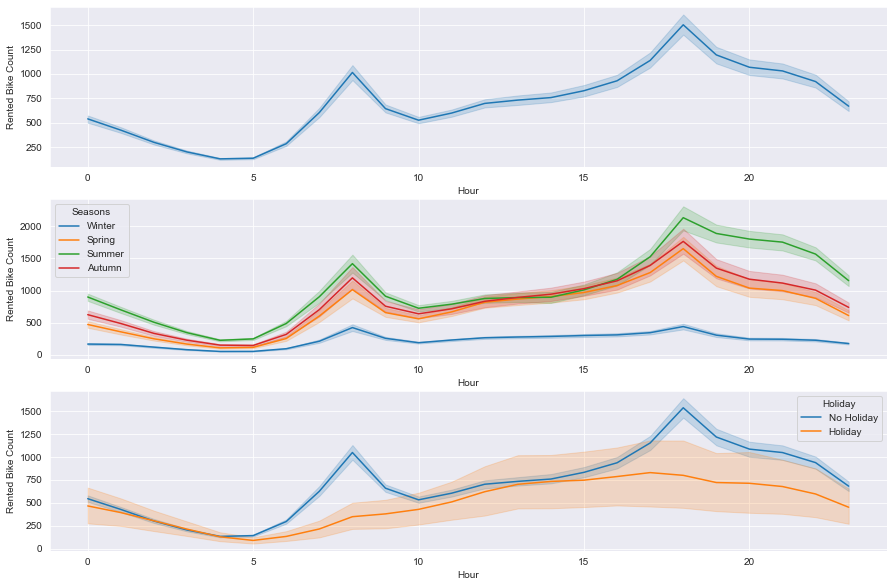

In [8]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (15,10))
sns.lineplot(data = df, x = "Hour", y = "Rented Bike Count", ax = ax[0])
sns.lineplot(data = df, x = "Hour", y = "Rented Bike Count", hue = "Seasons", ax = ax[1])
sns.lineplot(data = df, x = "Hour", y = "Rented Bike Count", hue = "Holiday", ax = ax[2])

> **Data Insights**
> - Summer season has the highest count in the dataset followed by Spring, Autumn and Winter.
> - There are less number of holiday records in the dataset approx. 500.
> - There are more functioning days compared to non functioning days.
> - These are the ranges for the highest observed counts in the dataset:
>> - Temperature: 20-30 degrees.
>> - Humidity: 50-60%.
>> - Wind Speed: Less than 2 m/s.
>> - Visibility (10m): 1800-2000m.
>> - Dew point temperature: 0-10 degrees.
>> - Solar Radiation(MJ/m2): 0-0.5MJ/m2.
>> - Rainfall(mm): 0-0.25mm.
>> - Snowfall(cm): 0-1cm.
> - Summer season has the highest rented bikes followed by spring, autumn and winter seasons.
> - The rented bikes were higher on a non holiday than on a holiday.
> - The most busiest time of the day where rented bikes were high was in the evening 17:00pm - 19:00pm followed by morning 7:00am - 8:00am.

In [9]:
## Checking for null values to be cleaned 

df.isnull().any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(�C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(�C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

> - Initial Hypothesis: There are no null values in the dataset from info() function.
> - Initial Hypothesis proved

Text(0.5, 1.0, 'Boxplot of Rented Bike Count (Outlier Detection)')

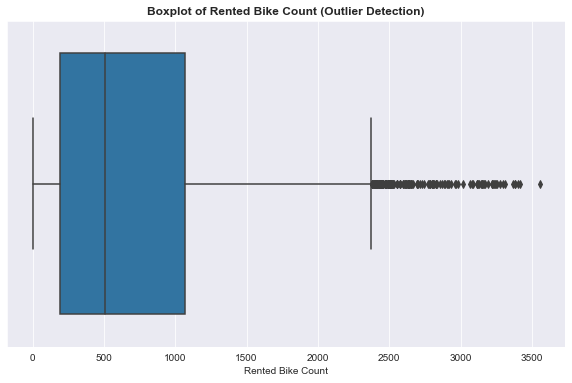

In [10]:
# Checking for any possible outliers 
plt.figure(figsize=(10,6))
sns.boxplot(df["Rented Bike Count"])
plt.title("Boxplot of Rented Bike Count (Outlier Detection)",fontweight="bold")

> - This seems like an interesting outcome. There are outliers in the target feature but can they really be called as outliers ?

In [11]:
# outlier analysis

# Summer
outlier_detection = df[df["Seasons"]=="Summer"]
summer_time = outlier_detection[outlier_detection["Rented Bike Count"]>2400]
print("The maximum value of rented bikes in \033[1mSummer\033[0m season:",outlier_detection["Rented Bike Count"].max())
print("The number of times the rented bikes crossed the threshold of 2400 (100th percentile):",
      len(outlier_detection[outlier_detection["Rented Bike Count"]>2400]))
print("The Hours where the possible outliers occured in \033[1mSummer\033[0m season:",summer_time["Hour"].unique())

print("-----------------------------------------------------")

# Spring
outlier_detection_spr = df[df["Seasons"]=="Spring"]
spring_time = outlier_detection_spr[outlier_detection_spr["Rented Bike Count"]>2400]
print("The maximum value of rented bikes in \033[1mSpring\033[0m season:",outlier_detection_spr["Rented Bike Count"].max())
print("The number of times the rented bikes crossed the threshold of 2400 (100th percentile):",
      len(outlier_detection_spr[outlier_detection_spr["Rented Bike Count"]>2400]))
print("The Hours where the possible outliers occured in \033[1mSpring\033[0m season:",spring_time["Hour"].unique())

print("-----------------------------------------------------")

# Autumn
outlier_detection_aut = df[df["Seasons"]=="Autumn"]
autumn_time = outlier_detection_aut[outlier_detection_aut["Rented Bike Count"]>2400]
print("The maximum value of rented bikes in \033[1mAutumn\033[0m season:",outlier_detection_aut["Rented Bike Count"].max())
print("The number of times the rented bikes crossed the threshold of 2400 (100th percentile):",
      len(outlier_detection_aut[outlier_detection_aut["Rented Bike Count"]>2400]))
print("The Hours where the possible outliers occured in \033[1mAutumn\033[0m season:",autumn_time["Hour"].unique())

print("-----------------------------------------------------")

# Winter
outlier_detection_win = df[df["Seasons"]=="Winter"]
winter_time = outlier_detection_win[outlier_detection_win["Rented Bike Count"]>2400]
print("The maximum value of rented bikes in \033[1mWinter\033[0m season:",outlier_detection_win["Rented Bike Count"].max())
print("The number of times the rented bikes crossed the threshold of 2400 (100th percentile):",
      len(outlier_detection_win[outlier_detection_win["Rented Bike Count"]>2400]))
print("The Hours where the possible outliers occured in \033[1mWinter\033[0m season:",winter_time["Hour"].unique())

The maximum value of rented bikes in Summer season: 3556
The number of times the rented bikes crossed the threshold of 2400 (100th percentile): 84
The Hours where the possible outliers occured in Summer season: [18 19 20 21 17  8 16]
-----------------------------------------------------
The maximum value of rented bikes in Spring season: 3251
The number of times the rented bikes crossed the threshold of 2400 (100th percentile): 31
The Hours where the possible outliers occured in Spring season: [18 19 17 16]
-----------------------------------------------------
The maximum value of rented bikes in Autumn season: 3298
The number of times the rented bikes crossed the threshold of 2400 (100th percentile): 32
The Hours where the possible outliers occured in Autumn season: [18 19 17]
-----------------------------------------------------
The maximum value of rented bikes in Winter season: 937
The number of times the rented bikes crossed the threshold of 2400 (100th percentile): 0
The Hours wh

> **Outlier detection observations**
> - The **initial hypothesis is there are outliers in the target feature**.
> - After visualisation of the boxplot it is evident that any value crossing 2400 are classified as outliers of the data.
> - Conducted a Outlier analysis study to justify the results in the boxplot.
>> - The results are surprising as the values greater thann 2400 are **extreme values** and not outliers.
>> - The data analysis results provide good support to this; where summer is the highest rented bikes season followed by other seasons.
>> - Morning and evening parts of the day also followed the same pattern 
> - Concluding these are **extreme values** present in the dataset and are **not outliers with no meaning**
>> - **For example**: *According to the dataset, in summer season more number of bikes are rented compared to the winter season. Additionally more number of people rented bikes in the morning and evening than other times of the day. Therefore, values ranging from 2400 - 3500 are present in summer season especially in the morning and evening  and not in the winter season. This logic is misinterpreted by the boxplot as outliers where in reality these are extreme values in the dataset*.
> -  **Initial Hypothesis Dismissed**

[Back to Contents](#Top)

---
## 4. Data Pre-processing <a class="anchor" id="4"></a>        

In [12]:
# converting the date feature to datetime format and splitting date to day, month and year
df['Date'] =  pd.to_datetime(df['Date'],dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
del df["Date"]

In [13]:
df.head() # displaying the head of the dataset

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


In [14]:
# One hot encoding                  

# instantiated the one hot encoder 
encoder = OneHotEncoder()

# performed one-hot encoding on season column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Seasons']]).toarray())

# merged one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

# renamed the one hot encoded columns 
final_df = final_df.rename(columns={0: "Autumn", 1: "Spring", 2: "Summer", 3: "Winter"})
final_df.head()

# deleted the existing seasons 
del final_df["Seasons"]

# replaced holiday and functioning day column with binary digits (since there are only two values)
final_df['Holiday'] = final_df['Holiday'].replace(['No Holiday'], 0)
final_df['Holiday'] = final_df['Holiday'].replace(['Holiday'], 1)

final_df['Functioning Day'] = final_df['Functioning Day'].replace(['No'], 0)
final_df['Functioning Day'] = final_df['Functioning Day'].replace(['Yes'], 1)

In [15]:
final_df.head() # displaying the head of the new dataset

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,12,0.0,0.0,0.0,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,12,0.0,0.0,0.0,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,12,0.0,0.0,0.0,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,12,0.0,0.0,0.0,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,12,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'The Count of Years')

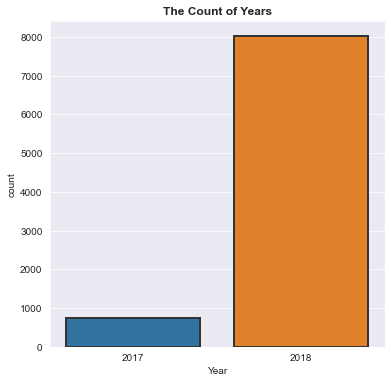

In [16]:
# Plotting the Year feature
plt.figure(figsize=(6,6))
sns.countplot(x = "Year", data = final_df,linewidth=2,edgecolor=".2")
plt.title("The Count of Years",fontweight="bold")

> - The whole dataset is ranging from December 2017 to December 2018 (November 30). So, this feature does not contribute to the model as most of the data in this feature is of constant value. Therefore, it is better to drop the **Year** column.

In [17]:
# Dropped the Year Column 
del final_df["Year"]

Text(0.5, 1.0, 'Correlation Plot')

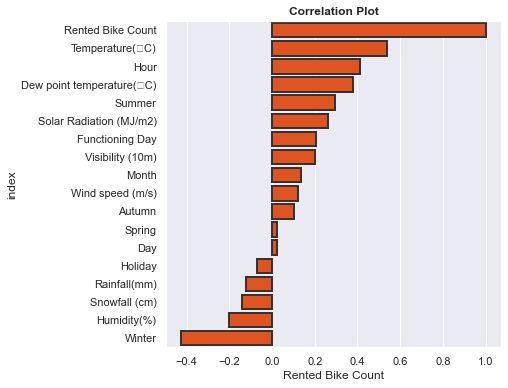

In [48]:
# The correlation plot
correlation = pd.DataFrame(final_df.corr()).reset_index().sort_values(by = 'Rented Bike Count',ascending = False)
sns.barplot(x = 'Rented Bike Count',y = 'index',data = correlation,color="orangered",linewidth=2,edgecolor=".2")
sns.set(rc = {'figure.figsize':(8,8)})
plt.title("Correlation Plot",fontweight="bold")

> **Observations**
> - **Temperature** has the highest positive correlation to the target feature while **Winter** has the highest negative correlation to the target feature
> - All the features having positive correlation:
>> - They are **directly proportional** to the target feature i.e if x (feature) increases y (target) also increases. The higher the correlation the stronger the proportionality.
> - All the features having negative correlation:
>> - They are **inversely proportional** to the target feature i.e if x (feature) increases y (target) decreases. The higher the correlation the stronger the inverse proportionality.

In [19]:
final_df.head() # displaying the head of the final dataset

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,12,0.0,0.0,0.0,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,12,0.0,0.0,0.0,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,12,0.0,0.0,0.0,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,12,0.0,0.0,0.0,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,12,0.0,0.0,0.0,1.0


[Back to Contents](#Top)

---
## 5. Train - Valid - Test Split <a class="anchor" id="5"></a>

In [20]:
# X  = Other features, Y = Target feature
X = final_df.drop(['Rented Bike Count'], axis=1)
Y = final_df["Rented Bike Count"]
X.shape,Y.shape

((8760, 17), (8760,))

In [21]:
train, x_test, target, y_test = train_test_split(X, Y, test_size=0.1, random_state=42) # train - test split

print("The train test split (90:10):",train.shape, x_test.shape)

print("--------------------------------------------------")
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size=0.1, random_state=42) # train - val split

print("The train valid split (90:10):",x_train.shape,x_val.shape)

print("--------------------------------------------------")

print("Split ratio - 80:10:10")
print("Train:",x_train.shape)
print("Valid:",x_val.shape)
print("Test:",x_test.shape)

The train test split (90:10): (7884, 17) (876, 17)
--------------------------------------------------
The train valid split (90:10): (7095, 17) (789, 17)
--------------------------------------------------
Split ratio - 80:10:10
Train: (7095, 17)
Valid: (789, 17)
Test: (876, 17)


[Back to Contents](#Top)

---
## 6. Model Evaluation <a class="anchor" id="6"></a>

### 6.1 Dummy Regressor (Baseline Model) <a class="anchor" id="6.1"></a>

- Regressor that makes predictions using simple rules.

In [22]:
dummy_regr = DummyRegressor() # instantiating the regressor
dummy_regr.fit(x_train, y_train) # fitting the train to the model 

pred_tr = dummy_regr.predict(x_train)
pred = dummy_regr.predict(x_val) # predicting on validation 

#scores
print("Training Set:")
print(f'R2 score = {r2_score(y_train,pred_tr)}') 

print("--------------------------------")

print("Validation Set:")
print(f'R2 score = {r2_score(y_val,pred)}')
print("Root Mean Square Error (RMSE) = ",np.sqrt(mean_squared_error(y_val,pred)))

Training Set:
R2 score = 0.0
--------------------------------
Validation Set:
R2 score = -8.802301928234613e-05
Root Mean Square Error (RMSE) =  634.7716106870827


Text(0.5, 1.0, 'Residual Plot')

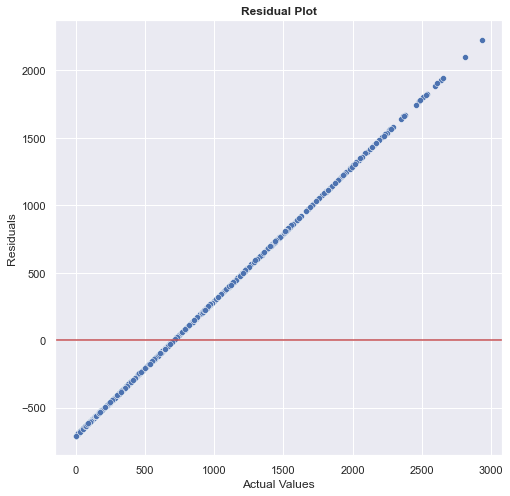

In [23]:
residuals = y_val - pred # residuals 

sns.scatterplot(x=y_val,y=residuals)
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
plt.axhline(y=0, color='r', linestyle='-')
sns.set(rc = {'figure.figsize':(6,6)})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot",fontweight="bold")

- As it can be seen from the above results. The Dummy Regressor always predict the r2_ score as 0, since it is always predicting a constant (mean) without having an insight of the output. ( In general, best r2_score is 1 and Constant r2_score is 0).
- The predicted values does not change as it always predicts the same value. 







> - Residual plot tells about finite variance between actual target value and predicted target value.In this plot,very less data points are have same finite variance between them and for most are not have it.

[Back to Contents](#Top)

---
### 6.2 KNN (Algorithm - 1) <a class="anchor" id="6.2"></a>

### 6.2.1 KNN Without Scaling <a class="anchor" id="6.2.1"></a>

In [24]:
kr = KNeighborsRegressor() # instantiating the Knn regressor 
kr.fit(x_train,y_train) # Fitting train set to the model

knn_pred = kr.predict(x_val) # prediction on validation
knn_pred_tr = kr.predict(x_train) # prediction on train

# Scores
print("Training Set:")
print(f'R2 score = {r2_score(y_train,knn_pred_tr)}') 

print("--------------------------------")

print("Validation Set:")
print(f'R2 score = {r2_score(y_val,knn_pred)}')
print("Root Mean Square Error (RMSE) = ",np.sqrt(mean_squared_error(y_val,knn_pred)))

Training Set:
R2 score = 0.6984110952407736
--------------------------------
Validation Set:
R2 score = 0.5723747962174486
Root Mean Square Error (RMSE) =  415.07829988049923


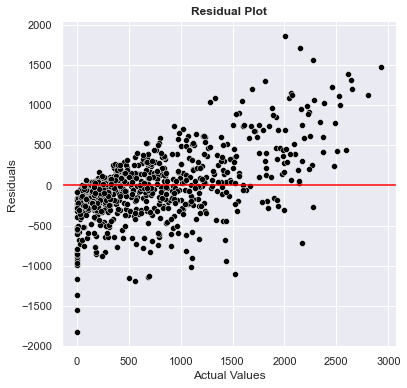

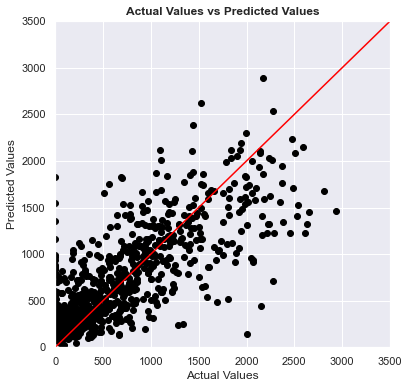

In [25]:
# Residual Plot
residuals = y_val - knn_pred # residuals 

sns.scatterplot(x=y_val,y=residuals,color="Black")
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
plt.axhline(y=0, color='red', linestyle='-')
sns.set(rc = {'figure.figsize':(6,6)})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot",fontweight="bold")

# Regression Plot (Linear)
plt.figure()
plt.scatter(y_val,knn_pred,color="Black") 
x = np.linspace(0,3500,100)
y=x
plt.plot(x, y,color='red')
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Actual Values vs Predicted Values",fontweight="bold")
plt.show()

[Back to Contents](#Top)

---
### 6.2.2 KNN With Scaling <a class="anchor" id="6.2.2"></a>

In [26]:
kr = KNeighborsRegressor() # Instantiating the regressor
scaler = MinMaxScaler() # Instantiating the scaler

x_train_new = scaler.fit_transform(x_train) # Scaling and fitting train (minmax)
x_val_new = scaler.transform(x_val) # Scaling validation(minmax)

kr.fit(x_train_new,y_train) # Fitting train set to the model

knn_pred_sc_tr = kr.predict(x_train_new) # Prediction on train
knn_pred_sc_val = kr.predict(x_val_new) # Prediction on validation

# Scores
print("Training Set:")
print(f'R2 score = {r2_score(y_train,knn_pred_sc_tr)}') 

print("--------------------------------")

print("Validation Set:")
print(f'R2 score = {r2_score(y_val,knn_pred_sc_val)}')
print("Root Mean Square Error (RMSE) = ",np.sqrt(mean_squared_error(y_val,knn_pred_sc_val)))

Training Set:
R2 score = 0.8773558081181183
--------------------------------
Validation Set:
R2 score = 0.8088436255755687
Root Mean Square Error (RMSE) =  277.51903365912136


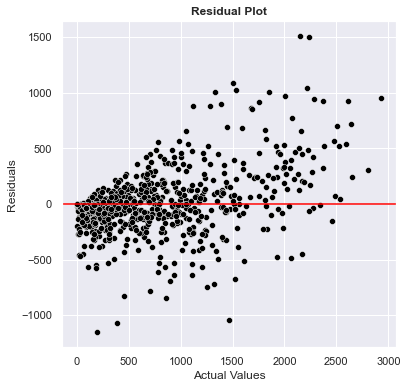

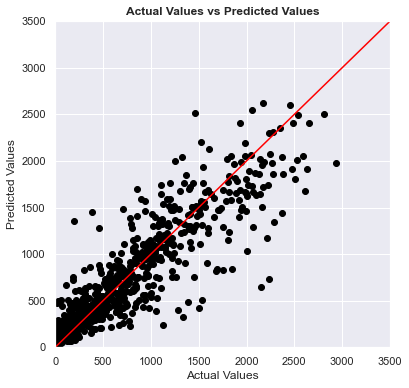

In [27]:
# Residual Plot
residuals = y_val - knn_pred_sc_val # residuals 

sns.scatterplot(x=y_val,y=residuals,color="Black")
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
plt.axhline(y=0, color='red', linestyle='-')
sns.set(rc = {'figure.figsize':(6,6)})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot",fontweight="bold")

# Regression Plot (Linear)
plt.figure()
plt.scatter(y_val,knn_pred_sc_val,color="Black") 
x = np.linspace(0,3500,100)
y=x
plt.plot(x, y,color='red')
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Actual Values vs Predicted Values",fontweight="bold")
plt.show()

[Back to Contents](#Top)

---
### 6.2.3 Hyperparameter Tuning  <a class="anchor" id="6.2.3"></a>
* n_neighbors : Number of neighbors required for each sample

### 6.2.3.1 RandomSearchCV <a class="anchor" id="6.2.3.1"></a>

In [28]:
start = time.time()

# Creating the parameter grid
n_neighbors = [int(x) for x in np.linspace(1,100,100)]

param_grid = {
    'n_neighbors' : n_neighbors
}

# Instantiating the grid search model
random_search = RandomizedSearchCV(estimator = kr, param_distributions = param_grid, 
                                   n_iter = 100, cv = 5,random_state= 42, n_jobs = -1)
random_search.fit(x_train_new, y_train)

print(f'Best Hyperparameter value: {random_search.best_estimator_}')
print("------------------------------------------------------------")
print(f'Time taken for randomsearchCV: {time.time() - start} seconds')

Best Hyperparameter value: KNeighborsRegressor(n_neighbors=3)
------------------------------------------------------------
Time taken for randomsearchCV: 14.799776077270508 seconds


---
### 6.2.3.2 GridSearchCV <a class="anchor" id="6.2.3.2"></a>

In [29]:
start = time.time()

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_neighbors' : [2,3,4,5,6,7],
}
# Instantiating the grid search model
grid_search = GridSearchCV(estimator = kr, param_grid = param_grid, cv = 5)
grid_search.fit(x_train_new, y_train)

print(f'Best Hyperparameter value: {grid_search.best_estimator_}')
print("------------------------------------------------------------")
print(f'Time taken for GridSearchCV: {time.time() - start} seconds')

Best Hyperparameter value: KNeighborsRegressor(n_neighbors=3)
------------------------------------------------------------
Time taken for GridSearchCV: 2.7920899391174316 seconds


In [30]:
df = pd.DataFrame(data=grid_search.cv_results_) # creating a dataframe to plot the hyperparameters
df.head() # displaying the head of the created dataframe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000638,0.000146,0.065167,0.017378,2,{'n_neighbors': 2},0.752863,0.773832,0.801053,0.783073,0.794653,0.781095,0.016946,5
1,0.000579,0.000094,0.070371,0.001971,3,{'n_neighbors': 3},0.766272,0.780987,0.821109,0.792006,0.802722,0.792619,0.018674,1
2,0.000558,0.000023,0.103149,0.004341,4,{'n_neighbors': 4},0.760798,0.779735,0.813975,0.794255,0.804675,0.790688,0.018783,2
3,0.000545,0.000007,0.103684,0.004322,5,{'n_neighbors': 5},0.762941,0.775139,0.812047,0.793556,0.795926,0.787922,0.017119,3
4,0.000548,0.000004,0.104804,0.003508,6,{'n_neighbors': 6},0.765835,0.772405,0.804132,0.789584,0.791668,0.784725,0.013835,4


Text(0.5, 1.0, 'Effect of parameter n_neighbors on Model Performance')

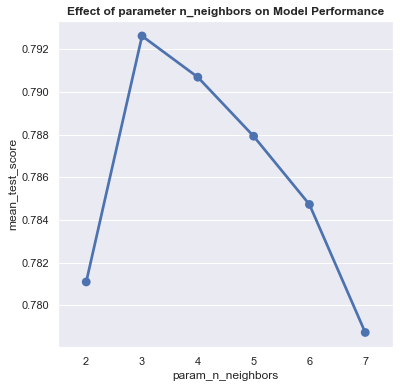

In [31]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_n_neighbors']],
             y='mean_test_score',x='param_n_neighbors',ax=ax)
sns.set(rc = {'figure.figsize':(6,6)})
plt.title("Effect of parameter n_neighbors on Model Performance",fontweight="bold")

In [32]:
# Fitting the values of the obtained optimal hyperparameter

kr = KNeighborsRegressor(n_neighbors=3) # Instantiating the regressor
kr.fit(x_train_new,y_train) # Fitting train set to the model

pred = kr.predict(x_train_new) # Predictions on train
pred_val = kr.predict(x_val_new) # Predictions on validation

# Scores
print("Training Set:")
print(f'R2 score = {r2_score(y_train,pred)}') 

print("--------------------------------")

print("Validation Set:")
print(f'R2 score = {r2_score(y_val,pred_val)}')
print("Root Mean Square Error (RMSE) = ",np.sqrt(mean_squared_error(y_val,pred_val)))

Training Set:
R2 score = 0.9085307324674754
--------------------------------
Validation Set:
R2 score = 0.8104724027451371
Root Mean Square Error (RMSE) =  276.334182615221


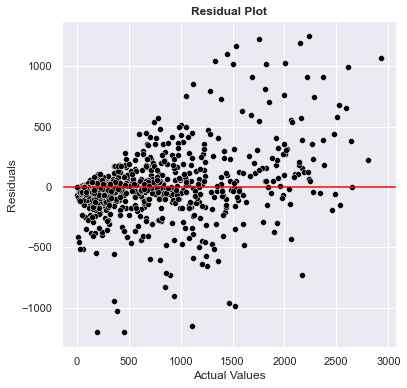

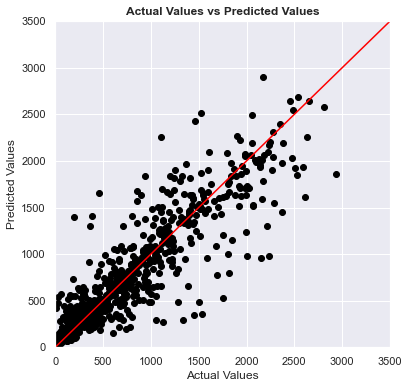

In [33]:
# Residual Plot
residuals = y_val - pred_val # residuals 

sns.scatterplot(x=y_val,y=residuals,color="Black")
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
plt.axhline(y=0, color='red', linestyle='-')
sns.set(rc = {'figure.figsize':(6,6)})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot",fontweight="bold")

# Regression Plot (Linear)
plt.figure()
plt.scatter(y_val,pred_val,color="Black") 
x = np.linspace(0,3500,100)
y=x
plt.plot(x, y,color='red')
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Actual Values vs Predicted Values",fontweight="bold")
plt.show()

[Back to Contents](#Top)

---
### 6.3 Decision Tree (Algorithm - 2) <a class="anchor" id="6.3"></a>

### 6.3.1 General model <a class="anchor" id="6.3.1"></a>

In [34]:
regressor = DecisionTreeRegressor(random_state=42) # Instantiating the regressor 
regressor.fit(x_train, y_train) # Fitting the train set to the model

dc_pred_tr = regressor.predict(x_train) # Predictions on train
dc_pred = regressor.predict(x_val) # Predictions on Validation

# Scores
print("Training Set:")
print(f'R2 score = {r2_score(y_train,dc_pred_tr)}') 

print("--------------------------------")

print("Validation Set:")
print(f'R2 score = {r2_score(y_val,dc_pred)}')
print("Root Mean Square Error (RMSE) = ",np.sqrt(mean_squared_error(y_val,dc_pred)))

Training Set:
R2 score = 1.0
--------------------------------
Validation Set:
R2 score = 0.7653032987981176
Root Mean Square Error (RMSE) =  307.5047826969453


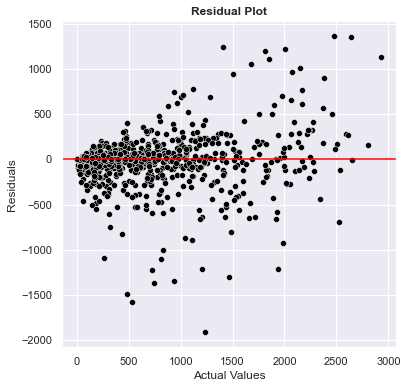

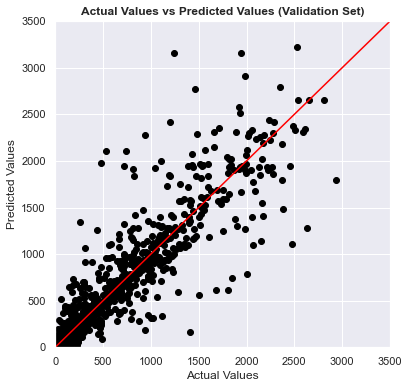

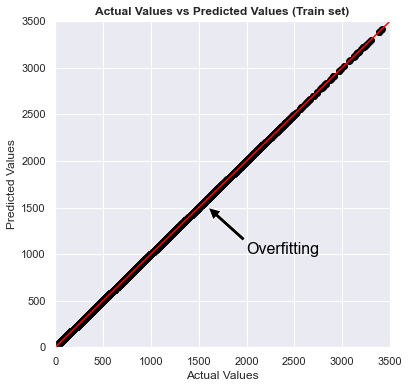

In [35]:
# Residual Plot
residuals = y_val - dc_pred # residuals 

sns.scatterplot(x=y_val,y=residuals,color="Black")
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
plt.axhline(y=0, color='red', linestyle='-')
sns.set(rc = {'figure.figsize':(6,6)})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot",fontweight="bold")

# Regression Plot (Linear)
plt.figure()
plt.scatter(y_val,dc_pred,color="Black") 
x = np.linspace(0,3500,100)
y=x
plt.plot(x, y,color='red')
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Actual Values vs Predicted Values (Validation Set)",fontweight="bold")
plt.show()

# Regression Plot (Train) (Linear)
plt.figure()
plt.scatter(y_train,dc_pred_tr,color="Black") 
x = np.linspace(0,3500,100)
y=x
plt.plot(x, y,color='red')
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Actual Values vs Predicted Values (Train set)",fontweight="bold")
plt.annotate('Overfitting', xy = (1600, 1500), fontsize = 16, xytext = (2000,1000), 
             arrowprops = dict(facecolor = 'Black'),color = 'Black')
plt.show()

> - From the above plot and scores we can see that the decision tree is performing **perfectly on the training set** and is performing **bad on the validation set**, these are the signs of **overfitting**. 
> - The regression plots also show us the proof of overfitting 

[Back to Contents](#Top)

---
### 6.3.2 Hyperparameter Tuning <a class="anchor" id="6.3.2"></a>

- max_depth = The maximum depth of the tree
- min_samples_split = The minimum number of samples required to split an internal node
- min_sample_leaf = The minimum number of samples required to be at a leaf node.

### 6.3.2.1 RandomSearchCV <a class="anchor" id="6.3.2.1"></a>

In [36]:
start = time.time()

# Creating the parameter grid
max_depth = [int(x) for x in np.linspace(1,100,50)]
min_samples_split = [int(x) for x in np.linspace(1,100,100)]
min_samples_leaf = [int(x) for x in np.linspace(1,100,100)]

param_grid = {
    'max_depth': max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
# Instantiating the grid search model
random_search_dt = RandomizedSearchCV(estimator = regressor, param_distributions = param_grid, n_iter = 100, 
                               cv = 5,random_state=42, n_jobs = -1)
random_search_dt.fit(x_train, y_train)

print(f'Best Hyperparameter value: {random_search_dt.best_estimator_}')
print("------------------------------------------------------------")
print(f'Time taken for randomsearchCV: {time.time() - start} seconds')

Best Hyperparameter value: DecisionTreeRegressor(max_depth=41, min_samples_leaf=6, min_samples_split=52,
                      random_state=42)
------------------------------------------------------------
Time taken for randomsearchCV: 1.6931169033050537 seconds


---
### 6.3.2.2 GridSearchCV <a class="anchor" id="6.3.2.2"></a>

In [37]:
start = time.time()

# Creating the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,25,35,45,55,65,75],
    'min_samples_split' : [42,52,62,72],
    'min_samples_leaf' : [2,3,4,5,6,7]
}
# Instantiating the grid search model
grid_search_dt = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                          cv = 5,n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

print(f'Best Hyperparameter value: {grid_search_dt.best_estimator_}')
print("------------------------------------------------------------")
print(f'Time taken for GridSearchCV: {time.time() - start} seconds')

Best Hyperparameter value: DecisionTreeRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=52,
                      random_state=42)
------------------------------------------------------------
Time taken for GridSearchCV: 3.2226479053497314 seconds


In [38]:
df = pd.DataFrame(data=grid_search_dt.cv_results_) # creating a dataframe to plot the hyperparameters
df.head() # displaying the head of the created dataframe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021822,0.001232,0.002213,0.001546,10,2,42,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.801346,0.809429,0.824521,0.843835,0.824048,0.820636,0.014578,154
1,0.021177,0.003943,0.001447,0.000199,10,2,52,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.800609,0.809367,0.824877,0.842843,0.825353,0.820610,0.014570,156
2,0.021970,0.002967,0.001775,0.000915,10,2,62,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.801567,0.808712,0.824629,0.840300,0.825459,0.820133,0.013641,160
3,0.021944,0.003453,0.001283,0.000007,10,2,72,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.796999,0.808280,0.826458,0.833741,0.825927,0.818281,0.013545,164
4,0.023358,0.003926,0.001773,0.000842,10,3,42,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.801377,0.809632,0.824448,0.844719,0.821176,0.820271,0.014739,157


Text(0.5, 1.0, 'Max Depth')

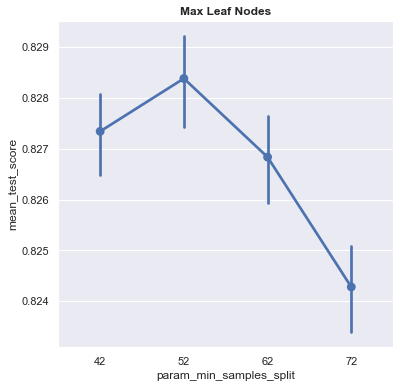

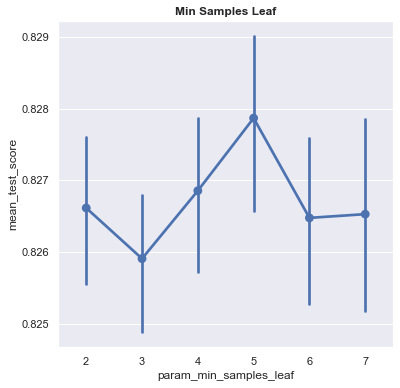

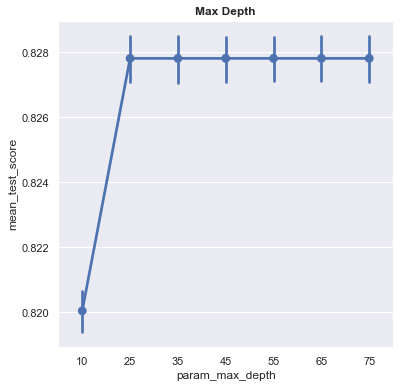

In [39]:
# Hyperparameter plots
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_min_samples_split',]],
             y='mean_test_score',x='param_min_samples_split',ax=ax)
sns.set(rc = {'figure.figsize':(6,6)})
plt.title("Max Leaf Nodes",fontweight="bold")

fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_min_samples_leaf',]],
             y='mean_test_score',x='param_min_samples_leaf',ax=ax)
sns.set(rc = {'figure.figsize':(6,6)})
plt.title("Min Samples Leaf",fontweight="bold")

fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_depth',]],
             y='mean_test_score',x='param_max_depth',ax=ax)
sns.set(rc = {'figure.figsize':(6,6)})
plt.title("Max Depth",fontweight="bold")


In [40]:
# Fitting the values of the obtained optimal hyperparameter
regressor = DecisionTreeRegressor(max_depth=25, min_samples_leaf=5, 
                                  min_samples_split=52,random_state=42)  # Instantiating the regressor 
regressor.fit(x_train, y_train) # Fitting the train set to the model

dc_pred_tr = regressor.predict(x_train) # Predictions on train
dc_pred = regressor.predict(x_val) # Predictions on Validation

# Scores
print("Training Set:")
print(f'R2 score = {r2_score(y_train,dc_pred_tr)}') 

print("--------------------------------")

print("Validation Set:")
print(f'R2 score = {r2_score(y_val,dc_pred)}')
print("Root Mean Square Error (RMSE) = ",np.sqrt(mean_squared_error(y_val,dc_pred)))

Training Set:
R2 score = 0.8847336152800036
--------------------------------
Validation Set:
R2 score = 0.8333658751249555
Root Mean Square Error (RMSE) =  259.10772112030304


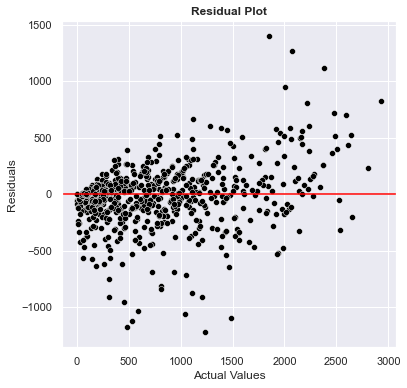

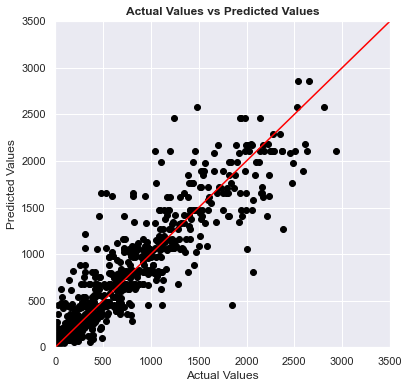

In [41]:
# Residual Plot
residuals = y_val - dc_pred # residuals 

sns.scatterplot(x=y_val,y=residuals,color="Black")
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
plt.axhline(y=0, color='red', linestyle='-')
sns.set(rc = {'figure.figsize':(6,6)})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot",fontweight="bold")

# Regression Plot (Linear)
plt.figure()
plt.scatter(y_val,dc_pred,color="Black") 
x = np.linspace(0,3500,100)
y=x
plt.plot(x, y,color='red')
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Actual Values vs Predicted Values",fontweight="bold")
plt.show()

[Back to Contents](#Top)

---
## 7. Model Selection <a class="anchor" id="7"></a>

In [42]:
# Creating a dataframe consisiting of models are their respective scores
Models = {'models':['Dummy Regressor','KNN Without Scaling','KNN With Scaling',
                    'KNN Hyperparameter Tuned','Decision Tree General','Decision Tree Hyperparameter Tuned'],
          'rmse score': [634.7716106870827,415.07829988049923,277.51903365912136,
                         276.334182615221,307.5047826969453,259.10772112030304],
          'r2 score': [-8.802301928234613e-05,0.5723747962174486,0.8088436255755687,
                       0.8104724027451371, 0.7653032987981176, 0.8333658751249555]}
model_selection = pd.DataFrame(Models) # Dataframe

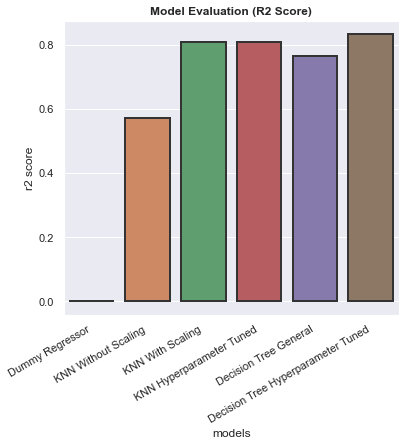

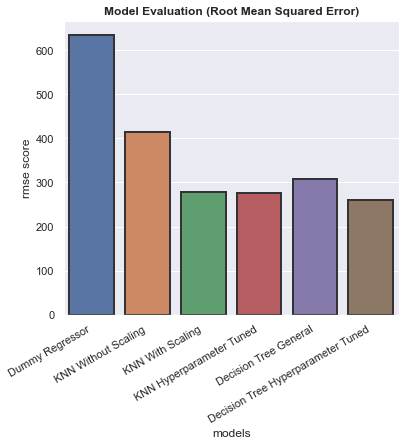

In [43]:
# Model selection plots
plt.figure(figsize=(6,6))
sns.barplot(y = "r2 score",x="models" ,data = model_selection,linewidth=2,edgecolor=".2")
plt.title("Model Evaluation (R2 Score)",fontweight="bold")
plt.gcf().autofmt_xdate()

plt.figure(figsize=(6,6))
sns.barplot(y = "rmse score",x="models" ,data = model_selection,linewidth=2,edgecolor=".2")
plt.title("Model Evaluation (Root Mean Squared Error)",fontweight="bold")
plt.gcf().autofmt_xdate()

> **Observations**
> - The Models have been evaluated under three metrics
>> - R2 score: tells the goodness of the fit.
>> - Mean absolute error: calculates the absolute difference between actual and predicted values.
>> - Root mean squared error: simple square root of mean squared error.
> -  From the above plots we can conclude that:
>> - Decision Tree (Hyperparameter Tuned) performs the best among all the models.
>> - Compared to the baseline model, decision tree with hyperparameter tuning reduces the errors (MAE & RMSE) by 300% and increases the r2 score from 0% to 83%.
>> - Both knn and decision tree perform well when hypertuned but decision tree performs a bit better.


[Back to Contents](#Top)

---
## 8. Test set evaluation <a class="anchor" id="8"></a>

In [44]:
# Fitting the values of the obtained optimal hyperparameter to the test set
regressor = DecisionTreeRegressor(max_depth=25, min_samples_leaf=5, 
                                  min_samples_split=52,random_state=42)  # Instantiating the regressor 
regressor.fit(x_train, y_train) # Fitting the train set to the model

dc_pred_tr = regressor.predict(x_train) # Predictions on train
dc_pred = regressor.predict(x_test) # Predictions on Validation

# Scores
print("Training Set:")
print(f'R2 score = {r2_score(y_train,dc_pred_tr)}') 

print("--------------------------------")

print("Test Set:")
print(f'R2 score = {r2_score(y_test,dc_pred)}')
print("Root Mean Square Error (RMSE) = ",np.sqrt(mean_squared_error(y_test,dc_pred)))

Training Set:
R2 score = 0.8847336152800036
--------------------------------
Test Set:
R2 score = 0.83929520669403
Root Mean Square Error (RMSE) =  258.71870634839104


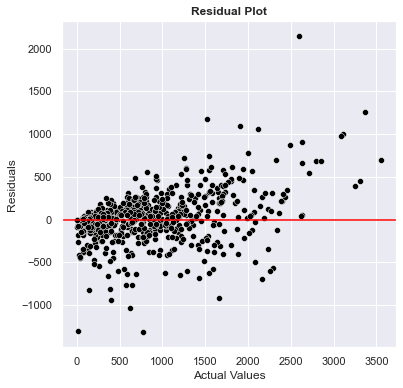

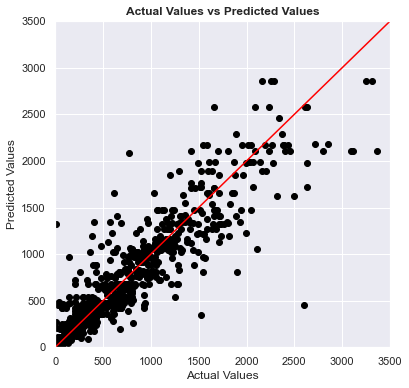

In [45]:
# Residual Plot
residuals = y_test - dc_pred # residuals 

sns.scatterplot(x=y_test,y=residuals,color="Black")
y = np.linspace(0,3500,100)
x = np.linspace(0,0)
plt.axhline(y=0, color='red', linestyle='-')
sns.set(rc = {'figure.figsize':(6,6)})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot",fontweight="bold")

# Regression Plot (Linear)
plt.figure()
plt.scatter(y_test,dc_pred,color="Black") 
x = np.linspace(0,3500,100)
y=x
plt.plot(x, y,color='red')
plt.ylim(0, 3500)
plt.xlim(0, 3500)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Actual Values vs Predicted Values",fontweight="bold")
plt.show()

[Back to Contents](#Top)

---
## 9. Conclusion <a class="anchor" id="9"></a>

In [46]:
# Creating a dataframe consisiting of models are their respective scores
Models = {'models':['Dummy Regressor','KNN Without Scaling','KNN With Scaling',
                    'KNN Hyperparameter Tuned','Decision Tree General','Decision Tree Hyperparameter Tuned','Test Set'],
          'rmse score': [634.7716106870827,415.07829988049923,277.51903365912136,
                         276.334182615221,307.5047826969453,259.10772112030304,258.71870634839104],
          'r2 score': [-8.802301928234613e-05,0.5723747962174486,0.8088436255755687,
                       0.8104724027451371, 0.7653032987981176, 0.8333658751249555,0.83929520669403]}
model_conclusion = pd.DataFrame(Models)

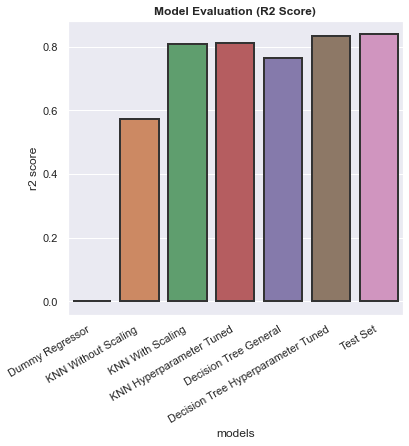

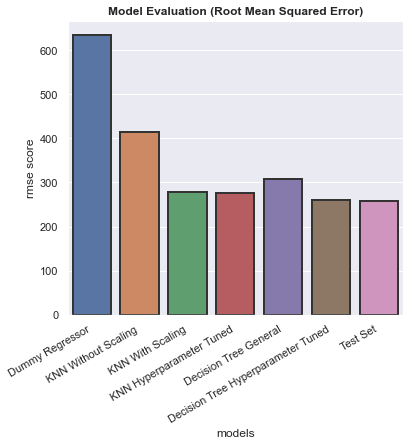

In [47]:
# Model selection plots
plt.figure(figsize=(6,6))
sns.barplot(y = "r2 score",x="models" ,data = model_conclusion,linewidth=2,edgecolor=".2")
plt.title("Model Evaluation (R2 Score)",fontweight="bold")
plt.gcf().autofmt_xdate()

plt.figure(figsize=(6,6))
sns.barplot(y = "rmse score",x="models" ,data = model_conclusion,linewidth=2,edgecolor=".2")
plt.title("Model Evaluation (Root Mean Squared Error)",fontweight="bold")
plt.gcf().autofmt_xdate()

> - The selected model i.e decision tree with hyperparameter tuning performs good on the test set.

---
## 10. References <a class="anchor" id="10"></a>
> - [Stack overflow](https://stackoverflow.com)
> - [SheCanCode](https://shecancode.io/blog/univariate-and-bivariate-analysis-usingseaborn)
> - [The Medium](https://medium.com)
> - [Analytics Vidhya](https://www.analyticsvidhya.com)
> - [Towards Data science](https://towardsdatascience.com)
> - [Kaggle](https://Kaggle.com)

[Back to Contents](#Top)

# Thank You 